# **Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

# **Load Dataset**

(1000, 2) (1000,)


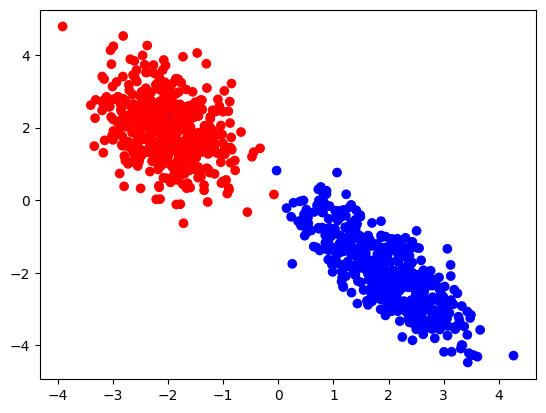

In [3]:
X, y = make_classification(n_samples=1000, n_features=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0,
                           n_classes=2, random_state=27)
print(X.shape, y.shape)

# Assigning colors based on class labels
colors = ['blue' if label == 0 else 'red' for label in y]

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.show()

### Train-Test Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

# **OOP Style**

In [ ]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

1.0

In [ ]:
model.intercept_, model.coef_

(array([-0.27505247]), array([[-3.06552241,  0.32327069]]))

In [ ]:
class ModelName:

    def __init__(self, penalty, ...):
        pass

    def fit(self, x, y):
        pass

    def predict(self, x):
        pass

    def score(self, x, y):
        pass

# **Neuron (from Scratch)**

## Activation Function

In [5]:
def relu(x):
    return np.maximum(0, x)

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
def tanh(x):
    return np.tanh(x)

## Loss

In [8]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [9]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

## Accuracy

In [10]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

## Neuron

In [11]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            #model
            y_hat = self.predict(x)
            #loss
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            #grad
            self.gradient(x, y, y_hat)
            #optimize
            self.gradient_descent()
            #print results
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [15]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron

In [21]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron

Neuron(2, <function sigmoid at 0x7b29103b75b0>)

In [19]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron

Neuron(2, sigmoid)

In [12]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron.predict(X)
print(neuron.predict(X[0]))
print(neuron.parameters())

[0.78282022]
{'w': array([[0.02924735],
       [0.93287451]]), 'b': -0.16834344595951814}


In [27]:
neuron.fit(x_train, y_train[:, None])
neuron.parameters()

Iter=0, Loss=0.4814
Iter=10, Loss=0.06785
Iter=20, Loss=0.03492
Iter=30, Loss=0.02469
Iter=40, Loss=0.01978
Iter=50, Loss=0.0169
Iter=60, Loss=0.015
Iter=70, Loss=0.01364
Iter=80, Loss=0.01262
Iter=90, Loss=0.01181


{'w': array([[-0.35963566],
        [ 2.03450835]]),
 'b': -0.15138104261280363}

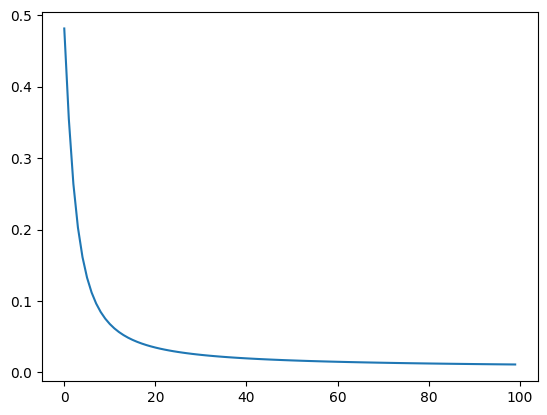

In [28]:
plt.plot(neuron.loss_hist)

## Train

In [ ]:
neuron = Neuron(2, af=sigmoid, loss_fn=bce, n_iter=500)
neuron.fit(X, y[:, None])

Iter=0, Loss=0.1246
Iter=10, Loss=0.1046
Iter=20, Loss=0.09236
Iter=30, Loss=0.0841
Iter=40, Loss=0.07812
Iter=50, Loss=0.07358
Iter=60, Loss=0.06999
Iter=70, Loss=0.0671
Iter=80, Loss=0.0647
Iter=90, Loss=0.06268
Iter=100, Loss=0.06095
Iter=110, Loss=0.05946
Iter=120, Loss=0.05815
Iter=130, Loss=0.057
Iter=140, Loss=0.05597
Iter=150, Loss=0.05505
Iter=160, Loss=0.05422
Iter=170, Loss=0.05347
Iter=180, Loss=0.05279
Iter=190, Loss=0.05216
Iter=200, Loss=0.05159
Iter=210, Loss=0.05106
Iter=220, Loss=0.05057
Iter=230, Loss=0.05011
Iter=240, Loss=0.04969
Iter=250, Loss=0.04929
Iter=260, Loss=0.04892
Iter=270, Loss=0.04857
Iter=280, Loss=0.04824
Iter=290, Loss=0.04793
Iter=300, Loss=0.04764
Iter=310, Loss=0.04737
Iter=320, Loss=0.04711
Iter=330, Loss=0.04686
Iter=340, Loss=0.04662
Iter=350, Loss=0.0464
Iter=360, Loss=0.04618
Iter=370, Loss=0.04598
Iter=380, Loss=0.04578
Iter=390, Loss=0.0456
Iter=400, Loss=0.04542
Iter=410, Loss=0.04525
Iter=420, Loss=0.04508
Iter=430, Loss=0.04492
Iter=440

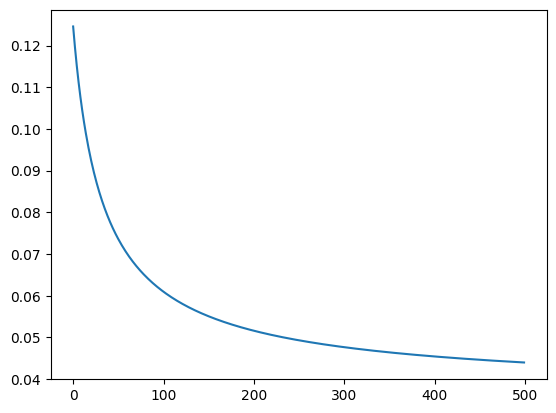

In [ ]:
plt.plot(neuron.loss_hist)

## Evaluation

In [ ]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [ ]:
y_hat[:, 0], y_test

(array([7.63763959e-03, 9.99826810e-01, 2.36177640e-06, 9.74818094e-01,
        3.85976971e-03, 6.02038032e-05, 2.60070029e-05, 9.91744690e-01,
        9.59263068e-01, 5.16361390e-04, 9.92327738e-01, 9.99964855e-01,
        9.99714479e-01, 9.93008139e-01, 9.84115996e-01, 9.99477560e-01,
        6.50648466e-03, 9.94067655e-01, 1.21473659e-05, 9.99717865e-01,
        2.17783317e-04, 1.30436365e-05, 7.74469696e-01, 9.96998745e-01,
        2.51148419e-02, 9.99617212e-01, 9.88831945e-01, 2.85163969e-04,
        9.97466388e-01, 3.21454066e-05, 1.29513907e-05, 2.99432074e-01,
        9.98026081e-01, 9.91567824e-01, 2.05525075e-05, 4.18275030e-03,
        9.96958179e-01, 2.55382646e-04, 1.85003445e-03, 9.88837049e-01,
        1.41880628e-05, 8.43449642e-01, 2.22418126e-03, 1.93212675e-03,
        3.23216248e-03, 9.98093668e-01, 9.99393253e-01, 5.01135052e-02,
        9.87622032e-01, 9.99969479e-01, 9.87584746e-01, 1.67977586e-03,
        9.99453619e-01, 1.29682830e-02, 4.78006422e-03, 9.882791

## Plot

<AxesSubplot: >

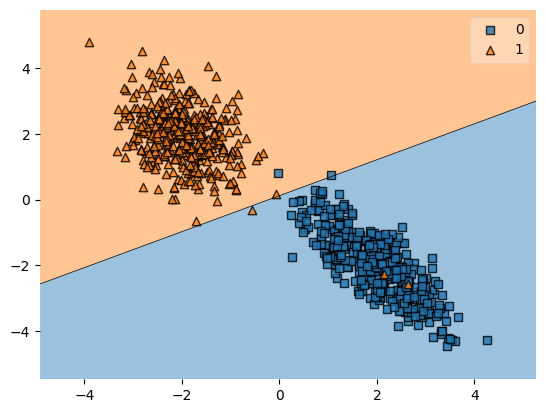

In [ ]:
plot_decision_regions(x_train, y_train, clf=neuron)

# **Question 1 - Example**

In [13]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1d3O-RZt4QjkCUSrrL8v5PXGQt3Me0QYi
# https://drive.google.com/file/d/1d3O-RZt4QjkCUSrrL8v5PXGQt3Me0QYi/view?usp=sharing

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1d3O-RZt4QjkCUSrrL8v5PXGQt3Me0QYi
To: /content/data.csv
100% 8.69k/8.69k [00:00<00:00, 29.5MB/s]


## Activation Function

In [31]:
def relu(x):
    return np.maximum(0, x)

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [33]:
def tanh(x):
    return np.tanh(x)

## Loss

In [34]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [35]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

## Accuracy

In [36]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

## Neuron

In [37]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

## Train

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
y

array([ 1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Transforming y values from {-1, 1} to {0, 1}
y = np.where(y == -1, 0, 1)

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
y

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0])

In [42]:
neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=True)
neuron.fit(X_train, y_train[:, None])
neuron.parameters()

Iter=0, Loss=0.3073
Iter=10, Loss=0.2032
Iter=20, Loss=0.1502
Iter=30, Loss=0.1192
Iter=40, Loss=0.09896
Iter=50, Loss=0.08486
Iter=60, Loss=0.07447
Iter=70, Loss=0.06651
Iter=80, Loss=0.06021
Iter=90, Loss=0.0551


{'w': array([[-1.73464695],
        [-1.63111085]]),
 'b': 0.562424828006806}

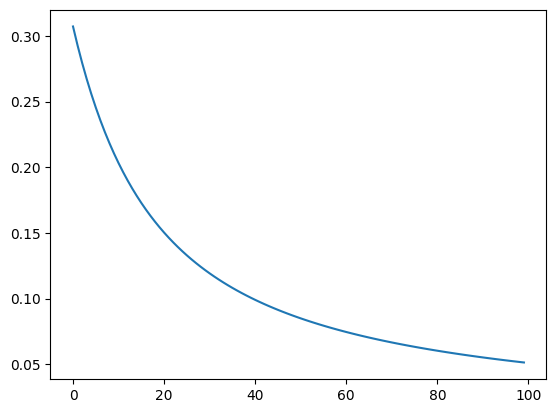

In [43]:
plt.plot(neuron.loss_hist)

## Evaluation

In [44]:
y_hat = neuron.predict(X_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [45]:
y_hat[:, 0], y_test

(array([0.96757931, 0.06546476, 0.98774108, 0.06751705, 0.97881086,
        0.99282476, 0.99821314, 0.01970582, 0.96811388, 0.11185095,
        0.0745936 , 0.98269184, 0.05267469, 0.98841838, 0.05575478,
        0.98607986, 0.01413364, 0.95355856, 0.00724065, 0.92726835,
        0.0192801 , 0.05515378, 0.02134304, 0.99428765, 0.97719607,
        0.96381452, 0.1663726 , 0.04812255, 0.02167112, 0.96905518,
        0.01598481, 0.0589123 , 0.99555222, 0.04000427, 0.99531592,
        0.97771369, 0.03396128, 0.05237587, 0.14305087, 0.92292298,
        0.98211946]),
 array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]))

## Plot

<Axes: >

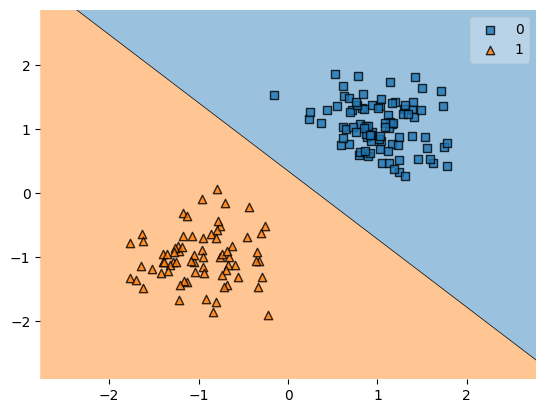

In [46]:
plot_decision_regions(X_train, y_train, clf=neuron)

<Axes: >

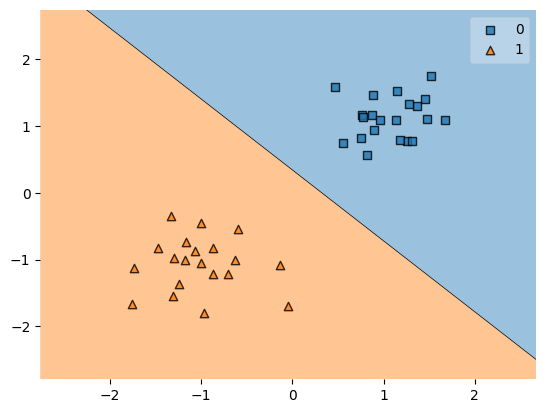

In [47]:
plot_decision_regions(X_test, y_test, clf=neuron)

## Sklearn

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Perceptron classifier
clf = Perceptron()

# Train the perceptron
clf.fit(X_train, y_train)

# Accuracy on train and test data
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Accuracy on train set: {train_accuracy}")
print(f"Accuracy on test set: {test_accuracy}")

# Convert y_train to integer type
y_train = y_train.astype(np.int)

# Plotting decision boundary
plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary - Perceptron')
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Perceptron classifier with a different threshold (example: 0.5)
clf = Perceptron(random_state=42, tol=0.001, max_iter=1000, eta0=0.1, verbose=0, n_jobs=-1)

# Train the perceptron with the new threshold
clf.fit(X_train, y_train)

# Accuracy on train and test data with the new threshold
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Accuracy on train set with new threshold: {train_accuracy}")
print(f"Accuracy on test set with new threshold: {test_accuracy}")

# Convert y_train to integer type
y_train = y_train.astype(np.int)

# Plotting decision boundary with the new threshold
plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary - Perceptron with New Threshold')
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Perceptron classifier without bias
clf = Perceptron(fit_intercept=False, random_state=42, tol=0.001, max_iter=1000, eta0=0.1, verbose=0, n_jobs=-1)

# Train the perceptron without bias
clf.fit(X_train, y_train)

# Accuracy on train and test data without bias
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Accuracy on train set without bias: {train_accuracy}")
print(f"Accuracy on test set without bias: {test_accuracy}")

# Convert y_train to integer type
y_train = y_train.astype(np.int)

# Plotting decision boundary without bias
plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary - Perceptron without Bias')
plt.show()
